In [1]:
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn import neighbors
from sklearn.linear_model import LogisticRegression

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [2]:
wifidf = pd.read_csv('wifidfnew.csv')

In [3]:
validationdf = pd.read_csv('validationdfnew.csv')

In [4]:
#features
X_train = wifidf.iloc[:, 1:521]
X_train = X_train.replace(100, 0)
X_train[X_train < -78] = 1
X_train[X_train < 0] = 2
#X_train = pd.concat([wifidf.iloc[:, 1:521], wifidf.iloc[:, 524]], axis=1)
X_train.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#X_train = X_train.astype(float)

In [6]:
#X_train = 10**(X_train/10)

In [7]:
X_train

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19932,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19933,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19934,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19935,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
#scaler = MinMaxScaler()
#scaler.fit(X_train)
#X_train_scaled = scaler.transform(X_train)

In [9]:
#X_train_scaled = pd.DataFrame(X_train_scaled)
#X_train_scaled

In [10]:
X_train = pd.concat([X_train, wifidf.iloc[:, 524]], axis=1)

In [12]:
X_train

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,BUILDINGID
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19932,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
19933,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
19934,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
19935,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [13]:
y_train = wifidf.iloc[:, 521]
y_train.head()

0   -7541.2643
1   -7536.6212
2   -7519.1524
3   -7524.5704
4   -7632.1436
Name: LONGITUDE, dtype: float64

In [14]:
#Testing Set (X Testing)
#X_validation = pd.concat([validationdf.iloc[:, 1:521], validationdf.iloc[:, 524]], axis=1)
#X_validation.head()
X_validation = validationdf.iloc[:, 1:521]
X_validation = X_validation.replace(100, 0)
X_validation[X_validation < -78] = 1
X_validation[X_validation < 0] = 2
X_validation.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
#X_validation = X_validation.astype(float)

In [16]:
#X_validation = 10**(X_validation/10)

In [17]:
X_validation

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1107,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1108,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1109,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
#X_validation_scaled = scaler.transform(X_validation)
#X_validation_scaled = pd.DataFrame(X_validation_scaled)

In [19]:
X_validation = pd.concat([X_validation, validationdf.iloc[:, 524]], axis=1)

In [20]:
X_validation

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,BUILDINGID
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1107,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1108,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1109,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
list(X_validation.columns)

['WAP001',
 'WAP002',
 'WAP003',
 'WAP004',
 'WAP005',
 'WAP006',
 'WAP007',
 'WAP008',
 'WAP009',
 'WAP010',
 'WAP011',
 'WAP012',
 'WAP013',
 'WAP014',
 'WAP015',
 'WAP016',
 'WAP017',
 'WAP018',
 'WAP019',
 'WAP020',
 'WAP021',
 'WAP022',
 'WAP023',
 'WAP024',
 'WAP025',
 'WAP026',
 'WAP027',
 'WAP028',
 'WAP029',
 'WAP030',
 'WAP031',
 'WAP032',
 'WAP033',
 'WAP034',
 'WAP035',
 'WAP036',
 'WAP037',
 'WAP038',
 'WAP039',
 'WAP040',
 'WAP041',
 'WAP042',
 'WAP043',
 'WAP044',
 'WAP045',
 'WAP046',
 'WAP047',
 'WAP048',
 'WAP049',
 'WAP050',
 'WAP051',
 'WAP052',
 'WAP053',
 'WAP054',
 'WAP055',
 'WAP056',
 'WAP057',
 'WAP058',
 'WAP059',
 'WAP060',
 'WAP061',
 'WAP062',
 'WAP063',
 'WAP064',
 'WAP065',
 'WAP066',
 'WAP067',
 'WAP068',
 'WAP069',
 'WAP070',
 'WAP071',
 'WAP072',
 'WAP073',
 'WAP074',
 'WAP075',
 'WAP076',
 'WAP077',
 'WAP078',
 'WAP079',
 'WAP080',
 'WAP081',
 'WAP082',
 'WAP083',
 'WAP084',
 'WAP085',
 'WAP086',
 'WAP087',
 'WAP088',
 'WAP089',
 'WAP090',
 'WAP091',

In [22]:
#Ground Truth (y_test) 
y_validation = validationdf.iloc[:, 521]
y_validation_count = len(y_validation.index)
print('The number of observations in the Y training set are:',str(y_validation_count))
y_validation.head()

The number of observations in the Y training set are: 1111


0   -7515.916799
1   -7383.867221
2   -7374.302080
3   -7365.824883
4   -7641.499303
Name: LONGITUDE, dtype: float64

In [23]:
X_train.shape, X_validation.shape

((19937, 521), (1111, 521))

In [24]:
#Models
modelSVR = SVR()
modelRF = RandomForestRegressor()
modelLR = LinearRegression()

In [79]:
modelknn = neighbors.KNeighborsRegressor(n_neighbors = 6, weights = 'distance')

In [27]:
#modelSVR.fit(X_train, y_train)
#modelRF.fit(X_train, y_train)
#modelLR.fit(X_train, y_train)

C:\Users\xenia\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\xenia\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
#modelknn.score(X_train, y_train)

0.9976951998403982

In [24]:
#modelSVR.score(X_train, y_train)

0.4653209194999257

In [25]:
#modelRF.score(X_train, y_train)

0.9741745525491656

In [26]:
#modelLR.score(X_train, y_train)

0.9392625537131493

In [80]:
modelknn.fit(X_train, y_train)
predictions = modelknn.predict(X_validation)

In [81]:
y_validation

0      -7515.916799
1      -7383.867221
2      -7374.302080
3      -7365.824883
4      -7641.499303
           ...     
1106   -7317.344231
1107   -7313.731120
1108   -7637.535798
1109   -7636.654005
1110   -7637.944120
Name: LONGITUDE, Length: 1111, dtype: float64

In [82]:
predictions

array([-7532.11931805, -7384.41327421, -7370.0107    , ...,
       -7638.18062241, -7639.04788903, -7639.48908632])

In [83]:
rmse = sqrt(mean_squared_error(y_validation, predictions))

In [84]:
predRsquared = r2_score(y_validation,predictions)

In [85]:
MAE = sum(abs(y_validation - predictions))/len(predictions)

In [86]:
#Make Predictions
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)
print('MAE: %.3f' % MAE)

R Squared: 0.994
RMSE: 9.248
MAE: 5.938


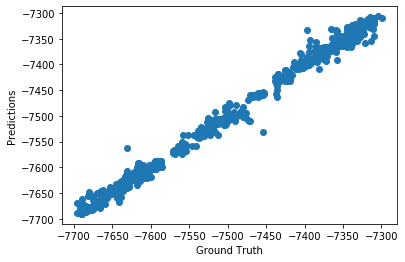

In [87]:
plt.scatter(y_validation, predictions)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [41]:
sum(abs(y_validation - predictions))

10598.577642723407

In [88]:
longitudeerror = y_validation - predictions

In [89]:
longitudeerror = pd.DataFrame(longitudeerror)

In [90]:
longitudeerror.columns = ['longitudeerror']

In [91]:
longitudeerror

,longitudeerror
0,16.202519
1,0.546053
2,-4.291380
3,0.133444
4,0.393320
...,...
1106,-3.405870
1107,40.715896
1108,0.644824
1109,2.393884


In [92]:
longitudeerror.to_csv('longitudeerror.csv')